In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [255]:
data = pd.read_csv('food-inspections.csv')
print(data.head())

   Inspection ID                                 DBA Name  \
0        2352683                   CHIPOTLE MEXICAN GRILL   
1        2352734                              CHILI'S T-I   
2        2352713  NICK'S FIRE GRILL STEAK & LEMONADE INC.   
3        2352701                  TAQUERIA BLUE LINE INC.   
4        2352727                 PORTAGE PARK DAY NURSERY   

                                  AKA Name  License #  \
0                   CHIPOTLE MEXICAN GRILL  2670642.0   
1                         CHILI'S (T1-B14)    34169.0   
2  NICK'S FIRE GRILL STEAK & LEMONADE INC.  2699090.0   
3                                      NaN  2703436.0   
4           MOSAIC EARLY CHILDHOOD ACADEMY  2215815.0   

                  Facility Type           Risk                  Address  \
0                    Restaurant  Risk 1 (High)       1025 W ADDISON ST    
1                    Restaurant  Risk 1 (High)       11601 W TOUHY AVE    
2                           NaN  Risk 1 (High)          2900 W 63

In [256]:
print(data.dtypes)
print(data.shape)

print(data['Violations'])

Inspection ID                   int64
DBA Name                       object
AKA Name                       object
License #                     float64
Facility Type                  object
Risk                           object
Address                        object
City                           object
State                          object
Zip                           float64
Inspection Date                object
Inspection Type                object
Results                        object
Violations                     object
Latitude                      float64
Longitude                     float64
Location                       object
Historical Wards 2003-2015    float64
Zip Codes                     float64
Community Areas               float64
Census Tracts                 float64
Wards                         float64
dtype: object
(196825, 22)
0         3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...
1         10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...
2                

In [257]:
high_risk_count = (data['Risk'] == 'Risk 1 (High)').sum()
medium_risk_count = (data['Risk'] == 'Risk 2 (Medium)').sum()
low_risk_count = (data['Risk'] == 'Risk 3 (Low)').sum()
        
"""
We would need to balance the dataset since the count of inspections
is varied ebtween high, medium, and low; we can use onehotencoding too
to seperate each one into 0, 1, or 3.
"""
print(f'High Risk: {high_risk_count}'
      f'\nMedium Risk: {medium_risk_count}'
      f'\nLow Risk: {low_risk_count}')

# Same thing goes for the results
pass_count = (data['Results'] == 'Pass').sum()
fail_count = (data['Results'] == 'Fail').sum()
pass_w_conditions_count = (data['Results'] == 'Pass w/ Conditions').sum()
out_of_business_count = (data['Results'] == 'Out of Business').sum()
print(f'Pass: {pass_count}'
      f'\nFail: {fail_count}'
      f'\nPass w/ Conditions: {pass_w_conditions_count}'
      f'\nOut of Business: {out_of_business_count}')

High Risk: 141129
Medium Risk: 38431
Low Risk: 17165
Pass: 106066
Fail: 38087
Pass w/ Conditions: 27448
Out of Business: 16919


In [258]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder (using sparse=False to get a dense array output)
encoder = OneHotEncoder(sparse_output=False)
risk_encoded = encoder.fit_transform(data[['Risk']]) 

# Convert the one-hot encoded array into a DataFrame for easier interpretation
risk_encoded_df = pd.DataFrame(risk_encoded, columns=encoder.get_feature_names_out(['Risk']))

print("One-Hot Encoded 'Risk' Values:")
print(risk_encoded_df[50:100])

results_encoded = encoder.fit_transform(data[['Results']])

One-Hot Encoded 'Risk' Values:
    Risk_All  Risk_Risk 1 (High)  Risk_Risk 2 (Medium)  Risk_Risk 3 (Low)  \
50       0.0                 0.0                   1.0                0.0   
51       0.0                 1.0                   0.0                0.0   
52       0.0                 0.0                   1.0                0.0   
53       0.0                 1.0                   0.0                0.0   
54       0.0                 1.0                   0.0                0.0   
55       0.0                 1.0                   0.0                0.0   
56       0.0                 1.0                   0.0                0.0   
57       0.0                 1.0                   0.0                0.0   
58       0.0                 0.0                   1.0                0.0   
59       0.0                 1.0                   0.0                0.0   
60       0.0                 0.0                   1.0                0.0   
61       0.0                 0.0             

<Axes: xlabel='Longitude', ylabel='Latitude'>

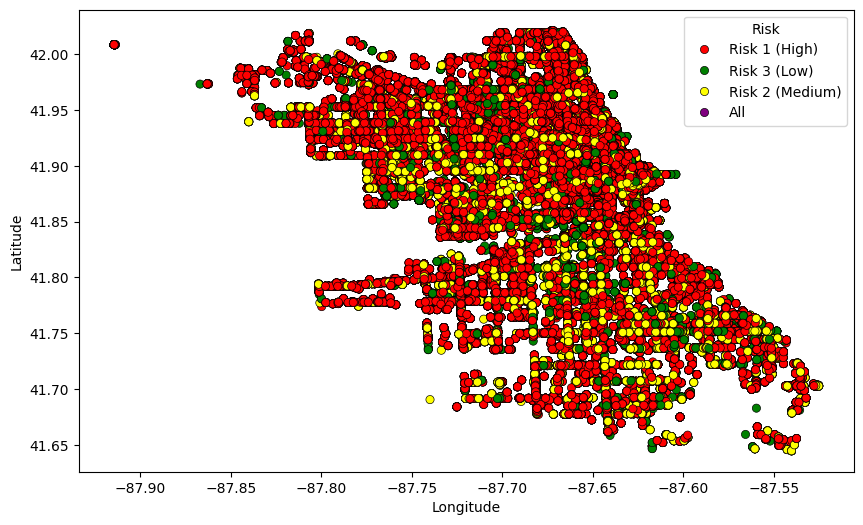

In [259]:
import seaborn as sns

risk_palette = {
    'Risk 1 (High)': 'red',
    'Risk 2 (Medium)': 'yellow',
    'Risk 3 (Low)': 'green',
    'All': 'purple'
}
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, 
                x='Longitude', 
                y='Latitude', 
                hue='Risk', 
                palette=risk_palette, 
                s=35,  # marker size
                edgecolor='black')



<Axes: xlabel='Longitude', ylabel='Latitude'>

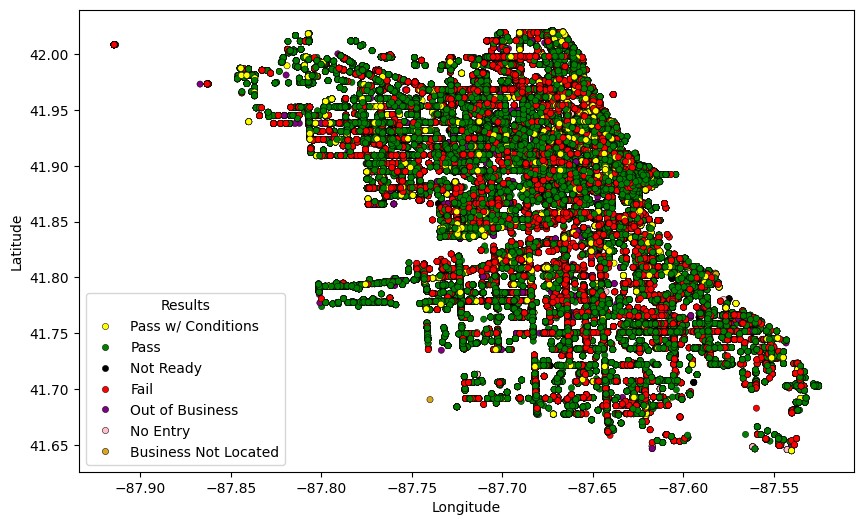

In [263]:
risk_palette = {
    'Pass': 'green',
    'Pass w/ Conditions': 'yellow',
    'Fail': 'red',
    'Out of Business': 'purple',
    'No Entry': 'pink',
    'Not Inspected': 'darkred',
    'Business Not Located': 'goldenrod',
    'Not Ready' : 'black',
    'All': 'black'
}
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, 
                x='Longitude', 
                y='Latitude', 
                hue='Results',
                palette=risk_palette, 
                s=20,  # marker size
                edgecolor='black',
                alpha=1) # opacity

In [261]:
X = data[['Inspection ID', 'Risk', 'Latitude', 'Longitude', 'Zip', 'Inspection Date']]

# Drop rows with missing values
data.dropna(subset=['Inspection ID', 'Risk', 'Latitude', 'Longitude', 'Zip', 'Inspection Date'], inplace=True)

# Reassign X and y after dropping NaN values
X = data[['Inspection ID', 'Risk', 'Latitude', 'Longitude', 'Zip', 'Inspection Date']]
y = data['Results']
X['Inspection Date'] = pd.to_datetime(X['Inspection Date'], errors='coerce')

print(X.head())
print(X['Latitude'].values)

   Inspection ID           Risk   Latitude  Longitude      Zip Inspection Date
0        2352683  Risk 1 (High)  41.947118 -87.655381  60613.0      2019-12-04
1        2352734  Risk 1 (High)  42.008536 -87.914428  60666.0      2019-12-04
2        2352713  Risk 1 (High)  41.779190 -87.695892  60629.0      2019-12-04
3        2352701  Risk 1 (High)  41.939168 -87.712546  60618.0      2019-12-04
4        2352727  Risk 1 (High)  41.946065 -87.760722  60641.0      2019-12-04
[41.94711775 42.0085364  41.7791895  ... 41.89843137 41.96160567
 41.93844282]


C:\Users\ioann\AppData\Local\Temp\ipykernel_49768\55425846.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Inspection Date'] = pd.to_datetime(X['Inspection Date'], errors='coerce')


In [ ]:
"""
model(s):
k-nearest neighbors
 - Embed the comments into a vector space and use cosine similarity to find similar comments
 to predict the outcome of whether this would be a pass or fail and the risk level. **(99.99% of risks are at 3 if it's a fail).

"""

In [262]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(features, test_size=0.2, random_state=0)

ValueError: not enough values to unpack (expected 4, got 2)